In [8]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL 3510\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
# Charger le fichier Excel
df = pd.read_excel("US_Superstore_data.xls")
# Afficher les premières lignes
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [5]:
print("Types de données dans chaque colonne:")
print(df.dtypes)
            
print(df.info()) 
print(df.describe()) 

Types de données dans chaque colonne:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID   

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64


C:\Users\DELL 3510\AppData\Local\Temp\ipykernel_24276\2285293028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=etat_ventes.index, y=etat_ventes.values, palette="Blues_r")


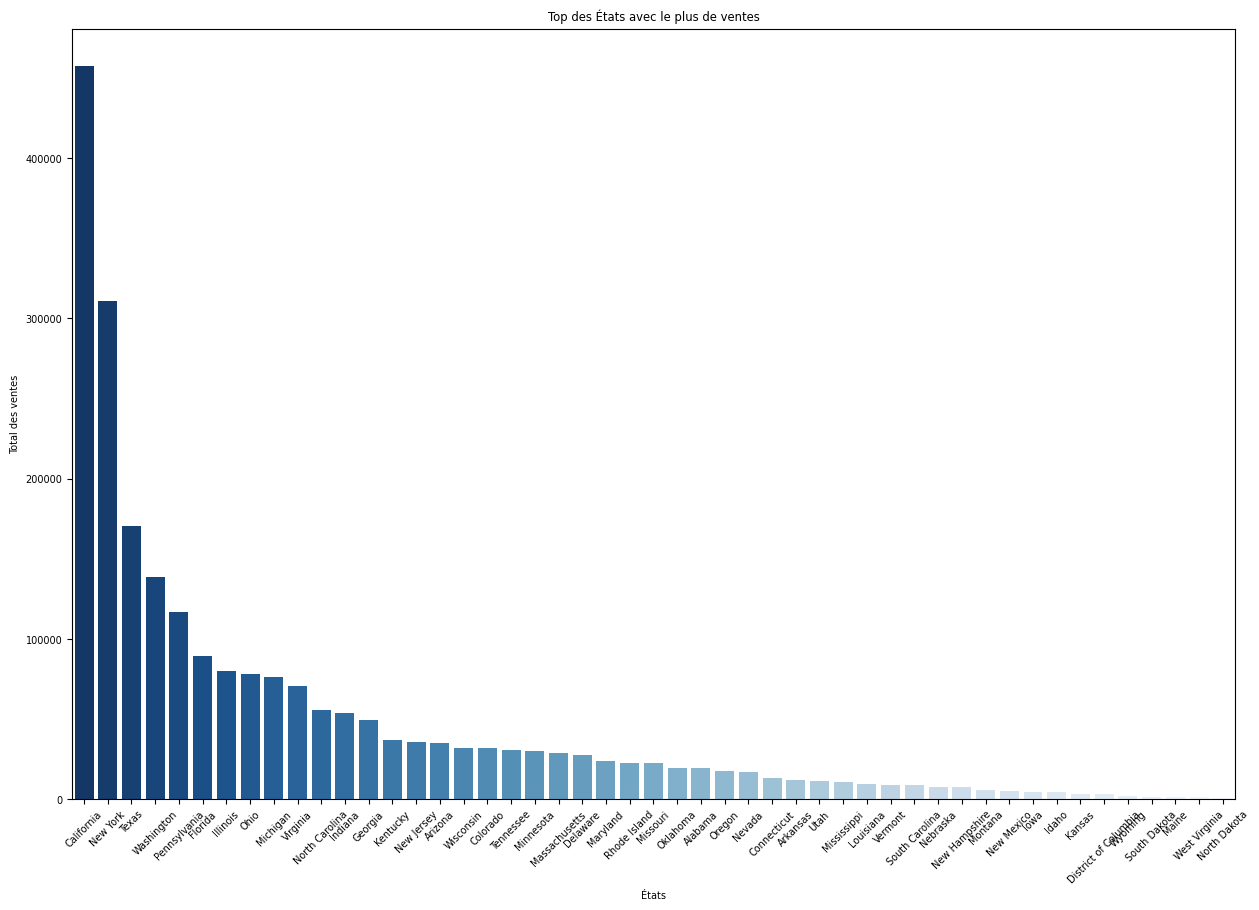

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper les ventes par État et trier par ordre décroissant
etat_ventes = df.groupby("State")["Sales"].sum().sort_values(ascending=False)

# Afficher les 5 États avec le plus de ventes
print(etat_ventes.head())

# Visualiser avec un graphique à barres
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 7})
sns.barplot(x=etat_ventes.index, y=etat_ventes.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("États")
plt.ylabel("Total des ventes")
plt.title("Top des États avec le plus de ventes")
plt.show()

In [7]:
# Calculer les ventes et bénéfices totaux pour chaque État
etat_comparaison = df.groupby("State")[["Sales", "Profit"]].sum()

# Filtrer uniquement New York et Californie
comparaison_ny_ca = etat_comparaison.loc[["New York", "California"]]

# Afficher les résultats
print(comparaison_ny_ca)


                  Sales      Profit
State                              
New York    310876.2710  74038.5486
California  457687.6315  76381.3871


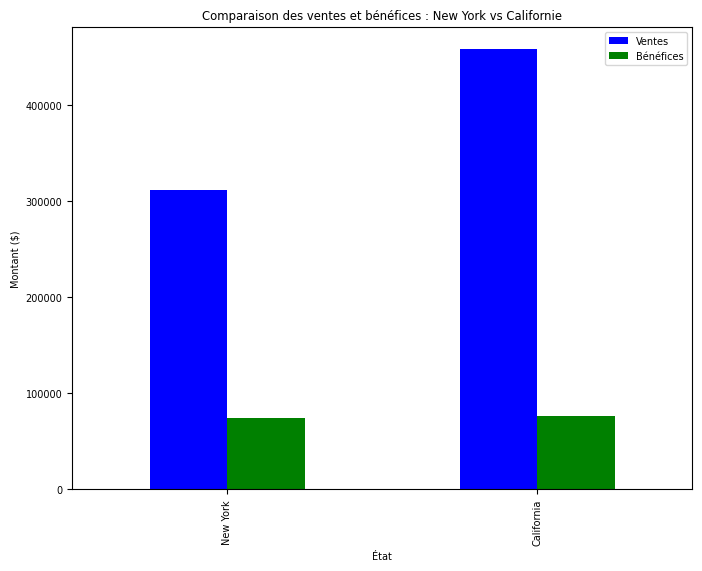

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graphique en barres pour comparer les ventes et profits
comparaison_ny_ca.plot(kind="bar", figsize=(8, 6), color=["blue", "green"])
plt.title("Comparaison des ventes et bénéfices : New York vs Californie")
plt.ylabel("Montant ($)")
plt.xlabel("État")
plt.legend(["Ventes", "Bénéfices"])
plt.show()


In [9]:
# Filtrer les clients de New York
ny_clients = df[df["State"] == "New York"]

# Regrouper par client et calculer le total des ventes
top_client = ny_clients.groupby("Customer Name")["Sales"].sum().idxmax()#Je veux juste le nom du client idxmax
#.sort_values(ascending=False).head(1) si je veux voir à la fois le nom et la valeur.

# Afficher le meilleur client
print("Le client avec le plus de ventes à New York est :", top_client)


Le client avec le plus de ventes à New York est : Tom Ashbrook


C:\Users\DELL 3510\AppData\Local\Temp\ipykernel_24276\3034805413.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_profit.index, y=total_profit.values, palette="Set1")


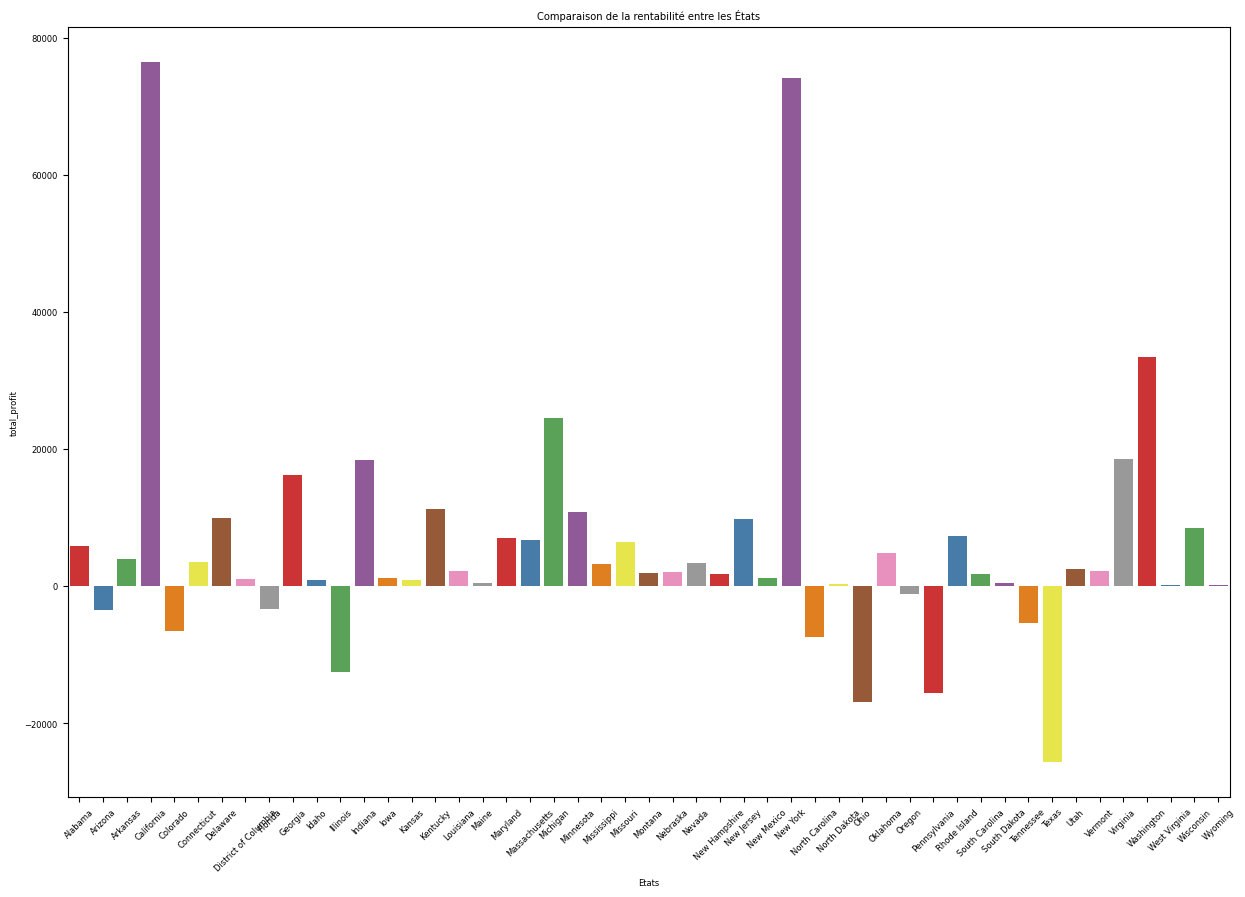

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la rentabilité totale par État
total_profit = df.groupby("State")["Profit"].sum()

# Visualiser avec un graphique à barres
# Visualiser les différences de rentabilité
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 6})
sns.barplot(x=total_profit.index, y=total_profit.values, palette="Set1")
plt.xticks(rotation=45)
plt.xlabel("Etats")
plt.ylabel("total_profit")
plt.title("Comparaison de la rentabilité entre les États")
plt.show()

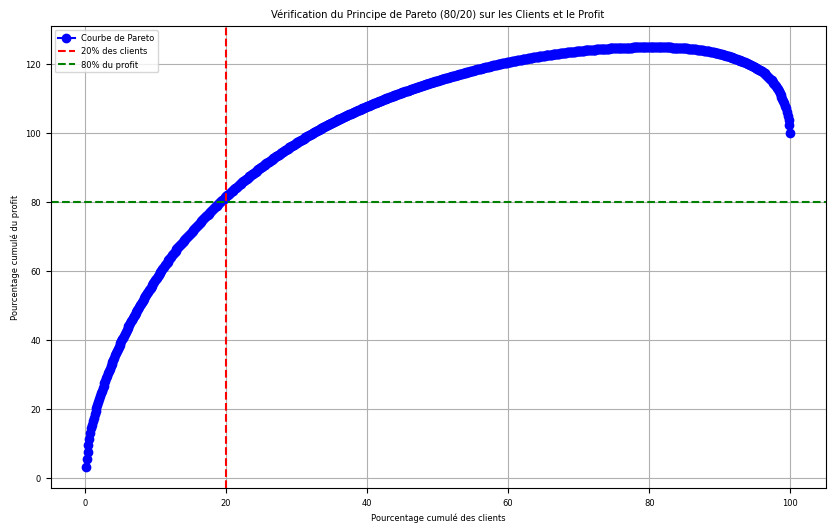

In [57]:
import numpy as np
# Regrouper les profits par client
client_profits = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

# Calculer le profit cumulé en pourcentage
client_profits_cumsum = client_profits.cumsum() / client_profits.sum() * 100

# Calculer le pourcentage cumulé des clients
clients_cumsum = np.arange(1, len(client_profits) + 1) / len(client_profits) * 100

plt.figure(figsize=(10, 6))
plt.plot(clients_cumsum, client_profits_cumsum, marker="o", linestyle="-", color="blue", label="Courbe de Pareto")

# Ajouter une ligne pour les 20 % des clients
plt.axvline(x=20, color="red", linestyle="--", label="20% des clients")
plt.axhline(y=80, color="green", linestyle="--", label="80% du profit")

plt.xlabel("Pourcentage cumulé des clients")
plt.ylabel("Pourcentage cumulé du profit")
plt.title("Vérification du Principe de Pareto (80/20) sur les Clients et le Profit")
plt.legend()
plt.grid()
plt.show()

City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64


C:\Users\DELL 3510\AppData\Local\Temp\ipykernel_24276\28946067.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_ventes.index[:20], y=city_ventes.values[:20], palette="YlOrRd")


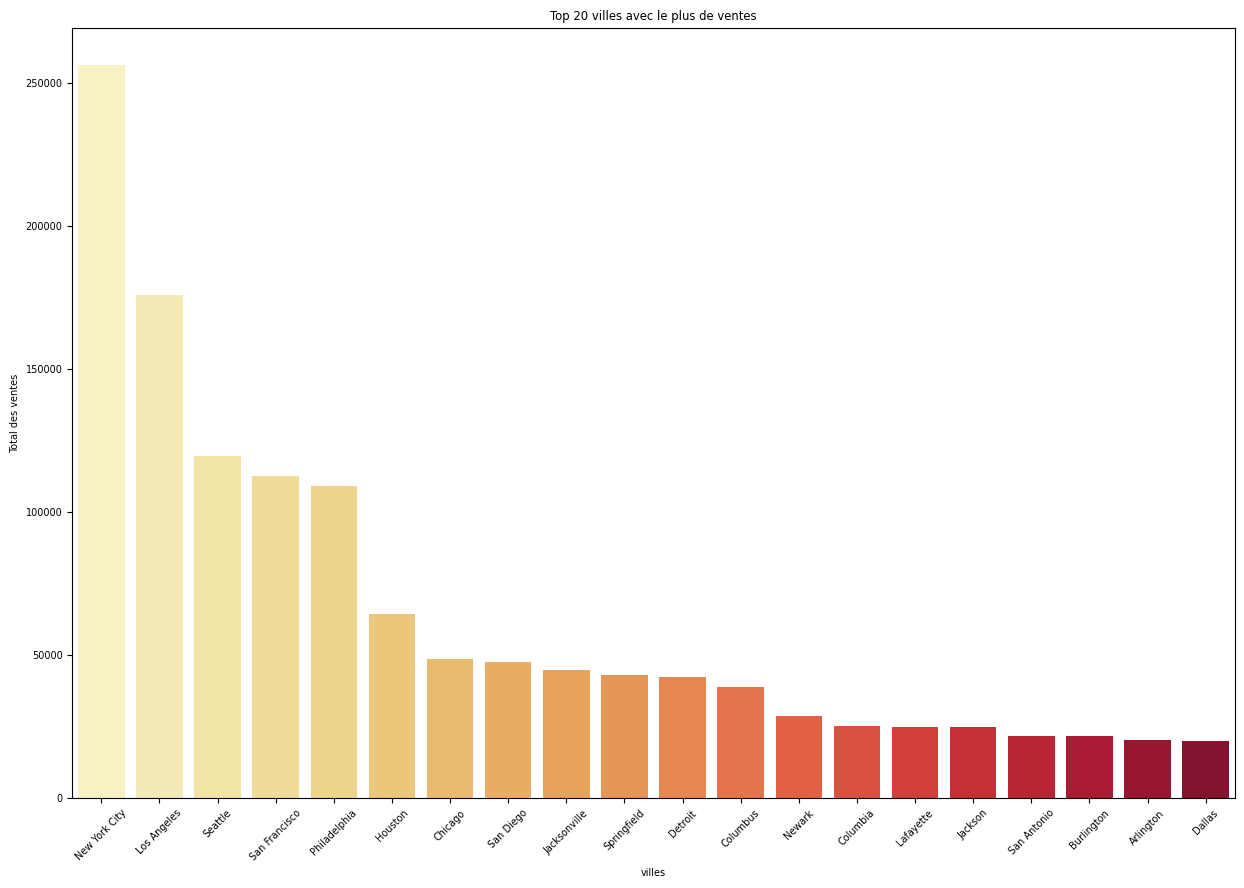

In [13]:
# Grouper les ventes par État et trier par ordre décroissant
city_ventes = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

# Afficher les 20 États avec le plus de ventes
print(city_ventes.head(20))

# Visualiser avec un graphique à barres
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 7})
sns.barplot(x=city_ventes.index[:20], y=city_ventes.values[:20], palette="YlOrRd")
plt.xticks(rotation=45)
plt.xlabel("villes")
plt.ylabel("Total des ventes")
plt.title("Top 20 villes avec le plus de ventes")
plt.show()

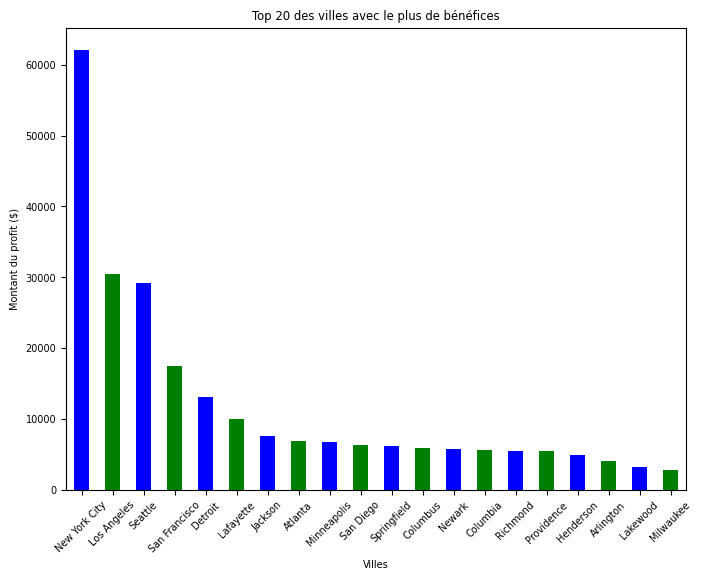

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5897.1013
Newark            5793.7588
Columbia          5606.1167
Richmond          5567.2486
Providence        5505.6569
Henderson         4911.8609
Arlington         4169.6969
Lakewood          3234.0278
Milwaukee         2793.0851
Name: Profit, dtype: float64


In [20]:
# Calculer les ventes et bénéfices totaux pour chaque État
city_profits = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(20)

#graphique à barres avec Seaborn
city_profits.plot(kind="bar", figsize=(8, 6), color=["blue", "green"])
plt.xticks(rotation=45)
plt.title("Top 20 des villes avec le plus de bénéfices")
plt.ylabel("Montant du profit ($)")
plt.xlabel("Villes")
plt.show()
# Afficher les résultats pour verification
print(city_profits)

<Figure size 1000x600 with 0 Axes>

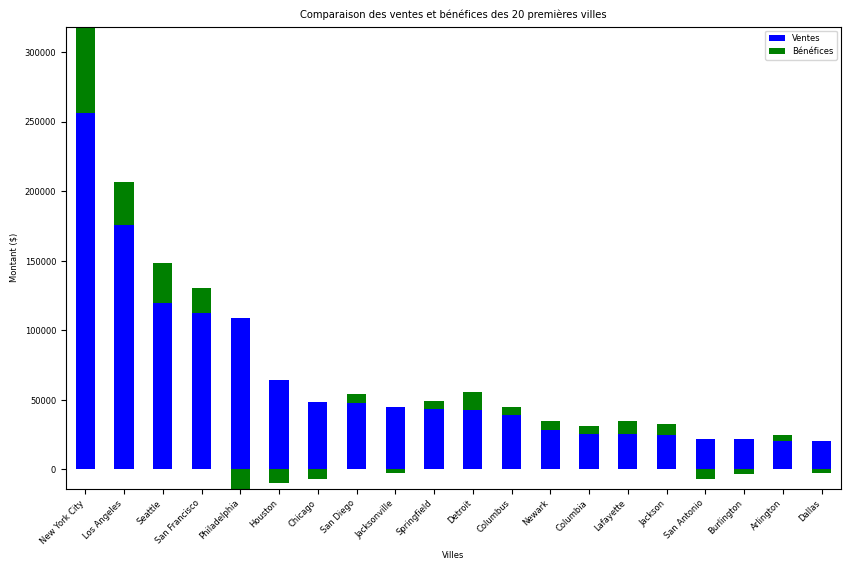

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer les ventes et bénéfices par ville et trier par ventes décroissantes
city_pro_Sal = df.groupby("City")[["Sales", "Profit"]].sum().sort_values(by="Sales", ascending=False).head(20)
# Trier par rentabilité décroissante et garder les 20 premières villes
city_pro_Sal["Rentability"] = city_pro_Sal["Profit"] / city_pro_Sal["Sales"]

#Affichager les resultats 
plt.figure(figsize=(10, 6))
city_pro_Sal.plot(kind="bar", stacked=True, figsize=(10, 6), color=["blue", "green"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Villes")
plt.ylabel("Montant ($)")
plt.title("Comparaison des ventes et bénéfices des 20 premières villes")
plt.legend(["Ventes", "Bénéfices"])
plt.show()

In [ ]:
# Regrouper par client et calculer le total des ventes
top_clients = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

# Afficher le meilleur client
print("Les 20 clients avec le plus de ventes est :", top_clients )

Le client avec le plus de ventes à New York est : Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


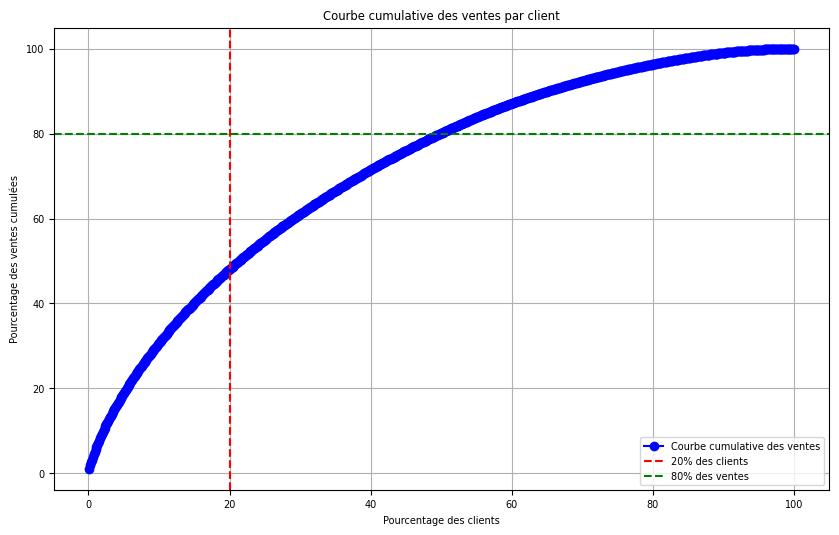

In [ ]:
# Grouper les ventes par État et trier par ordre décroissant
costumers_ventes = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
# Calculer la somme cumulative des ventes
cumulative_sales = costumers_ventes.cumsum()
# Calculer le pourcentage cumulé des ventes et du nombre de clients
total_sales = costumers_ventes.sum()
cumulative_sales_percent = cumulative_sales / total_sales * 100
cumulative_clients_percent = np.arange(1, len(costumers_ventes) + 1) / len(costumers_ventes) * 100

# Tracer la courbe cumulative
plt.figure(figsize=(10, 6))
plt.plot(cumulative_clients_percent, cumulative_sales_percent, marker='o', linestyle='-', color='b', label="Courbe cumulative des ventes")
plt.axvline(x=20, color='r', linestyle='--', label="20% des clients")
plt.axhline(y=80, color='g', linestyle='--', label="80% des ventes")

# Ajouter les labels et le titre
plt.xlabel("Pourcentage des clients")
plt.ylabel("Pourcentage des ventes cumulées")
plt.title("Courbe cumulative des ventes par client")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


Il est préférable de cibler les États et villes les plus rentables pour maximiser l’impact des stratégies marketing. Les zones avec de fortes ventes mais une faible rentabilité nécessitent un ajustement des prix ou des coûts. En appliquant le principe de Pareto, il est possible de se concentrer sur les clients et régions les plus profitables. Enfin, les villes moins rentables pourraient bénéficier d’une adaptation de l’offre ou d’une révision des investissements marketing.